# 4TIPE
sauvagement recopié à partir de :  

https://github.com/shayanalibhatti/Coding-neural_network-for-XOR-logic-from-scratch  
Très interessant, à l'image de Tensorflow, il utilise les matrices pour faire les opérations !!!

## Single Hidden Layer Neural Network XOR Logic Code from Scratch

#### First I import numpy library and matplotlib used to display loss curve 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Then I defined the inputs and structure of neural network

In [3]:
# These are XOR inputs
x=np.array([[0,1,0,1],[0,1,1,0]])
# These are XOR outputs
y=np.array([[0,0,1,1]])
# Number of inputs
n_x = 2
# Number of neurons in output layer
n_y = 1
# Number of neurons in hidden layer
n_h = 2
# Total training examples
m = x.shape[1] # égal à 2
# Learning rate
lr = 0.1
# Define random seed for consistent results
# np.random.seed(2) # Pour supprimer le pseudo hasard
# Define weight matrices for neural network
np.random.seed(2)
w1 = np.random.randn(n_h,n_x)   # Weight matrix for hidden layer
w2 = np.random.randn(n_y,n_h)   # Weight matrix for output layer
# I didnt use bias units
# We will use this list to accumulate losses
losses = []
print(w1)
print(w2)

[[-0.41675785 -0.05626683]
 [-2.1361961   1.64027081]]
[[-1.79343559 -0.84174737]]


#### Here I define the important processes as Python methods

In [4]:
# I used sigmoid activation function for hidden layer and output
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z

# Forward propagation
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)   
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

# Backward propagation
def back_prop(m,w1,w2,z1,a1,z2,a2,y):
    dz2 = (a2-y)* a2*(1-a2)
    dw2 = np.dot(dz2,a1.T)
    dz1 = np.dot(w2.T,dz2) * a1*(1-a1)
    dw1 = np.dot(dz1,x.T)
    
    dw1 = np.reshape(dw1,w1.shape)
    dw2 = np.reshape(dw2,w2.shape)    
    return dz2,dw2,dz1,dw1

#### Now we run the neural network for 10000 iterations and observe the loss value

In [5]:
w1 = np.random.rand(n_h,n_x)   # Weight matrix for hidden layer
w2 = np.random.rand(n_y,n_h)   # Weight matrix for output layer

Text(0, 0.5, 'Loss value')

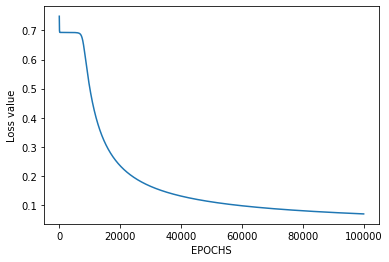

In [6]:
iterations = 100_000
for i in range(iterations):
    z1,a1,z2,a2 = forward_prop(w1,w2,x)
    loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
    losses.append(loss)
    da2,dw2,dz1,dw1 = back_prop(m,w1,w2,z1,a1,z2,a2,y)
    w2 = w2-lr*dw2
    w1 = w1-lr*dw1

# We plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

#### Now after training we see how our neural network is doing in terms of predictions

In [7]:
def predict(w1,w2,input):
    z1,a1,z2,a2 = forward_prop(w1,w2,test)
    a2 = np.squeeze(a2)
    print("Les entrées", [i[0] for i in input], f"donnent en sortie {a2}")
    """
    if a2>=0.5:
        print("Les entrées", [i[0] for i in input], "output is 1")# ['{:.2f}'.format(i) for i in x])
    else:
        print("For input", [i[0] for i in input], "output is 0")
    
    """

#### Here are the predictions of our trained neural network

In [8]:
test = np.array([[1],[0]])
predict(w1,w2,test)
test = np.array([[0],[0]])
predict(w1,w2,test)
test = np.array([[0],[1]])
predict(w1,w2,test)
test = np.array([[1],[1]])
predict(w1,w2,test)

Les entrées [1, 0] donnent en sortie 0.9295281916216991
Les entrées [0, 0] donnent en sortie 0.03356776609399469
Les entrées [0, 1] donnent en sortie 0.9295281849281336
Les entrées [1, 1] donnent en sortie 0.09395448088880454


# Test

In [48]:
print(w1)
print(w2)

[[7.72082882 7.71709904]
 [0.92628346 0.92627674]]
[[ 26.3066333  -33.07848142]]


In [29]:
np.dot(np.dot(np.array([0, 1]), w1), w2.T)

array([-6.26998541])

In [9]:
z1,a1,z2,a2 = forward_prop(w1,w2,x)
a2

array([[0.59275141, 0.62450682, 0.61469667, 0.60410513]])

In [10]:
dz2 = (a2-y)* a2*(1-a2)
dz2

array([[ 0.14308852,  0.14644563, -0.09125704, -0.09468306]])

In [11]:
dw2 = np.dot(dz2,a1.T)
dw2

array([[0.06282664, 0.05799954]])

In [12]:
dz1 = np.dot(w2.T,dz2) * a1*(1-a1)
dz1

array([[ 0.01503745,  0.01218363, -0.00890097, -0.00949214],
       [ 0.01181678,  0.01147291, -0.00719028, -0.00781796]])

In [13]:
dw1 = np.dot(dz1,x.T)
dw1

array([[0.00269149, 0.00328266],
       [0.00365495, 0.00428263]])

In [14]:
dw1 = np.reshape(dw1,w1.shape)
dw2 = np.reshape(dw2,w2.shape) 
print(dw1)
print(dw2)

[[0.00269149 0.00328266]
 [0.00365495 0.00428263]]
[[0.06282664 0.05799954]]


In [15]:
w2 = w2-lr*dw2
w1 = w1-lr*dw1

In [16]:
w1

array([[0.43572575, 0.54933421],
       [0.02556074, 0.43489413]])

In [17]:
w2

array([[0.41408514, 0.32453487]])